# Prac 02
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

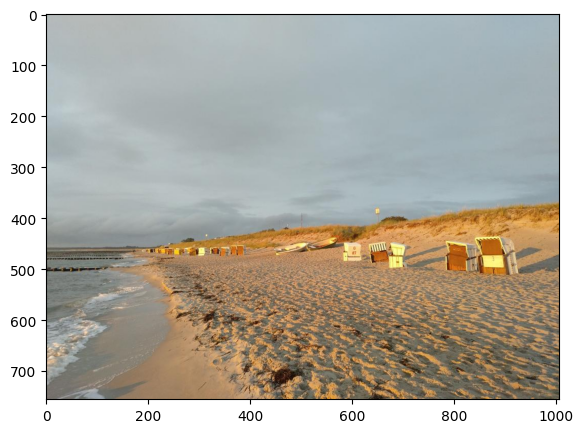

In [10]:
img = cv2.imread('sea.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

(<Axes: >, <matplotlib.image.AxesImage at 0x1cc11294590>)

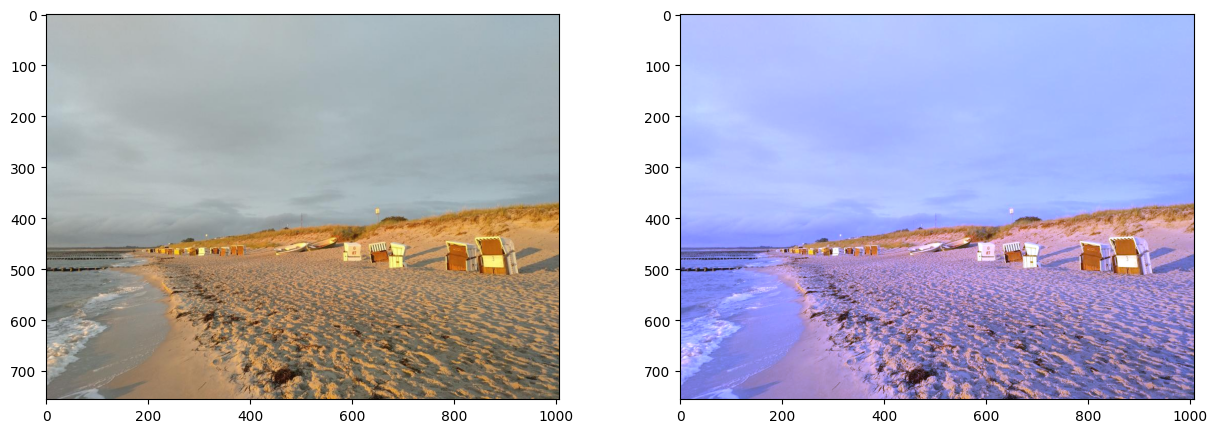

In [ ]:

# Define white patch and the coefficients
row, col = 485, 864 
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Gray world
This algorithm assumes that a scene, on average, is gray.

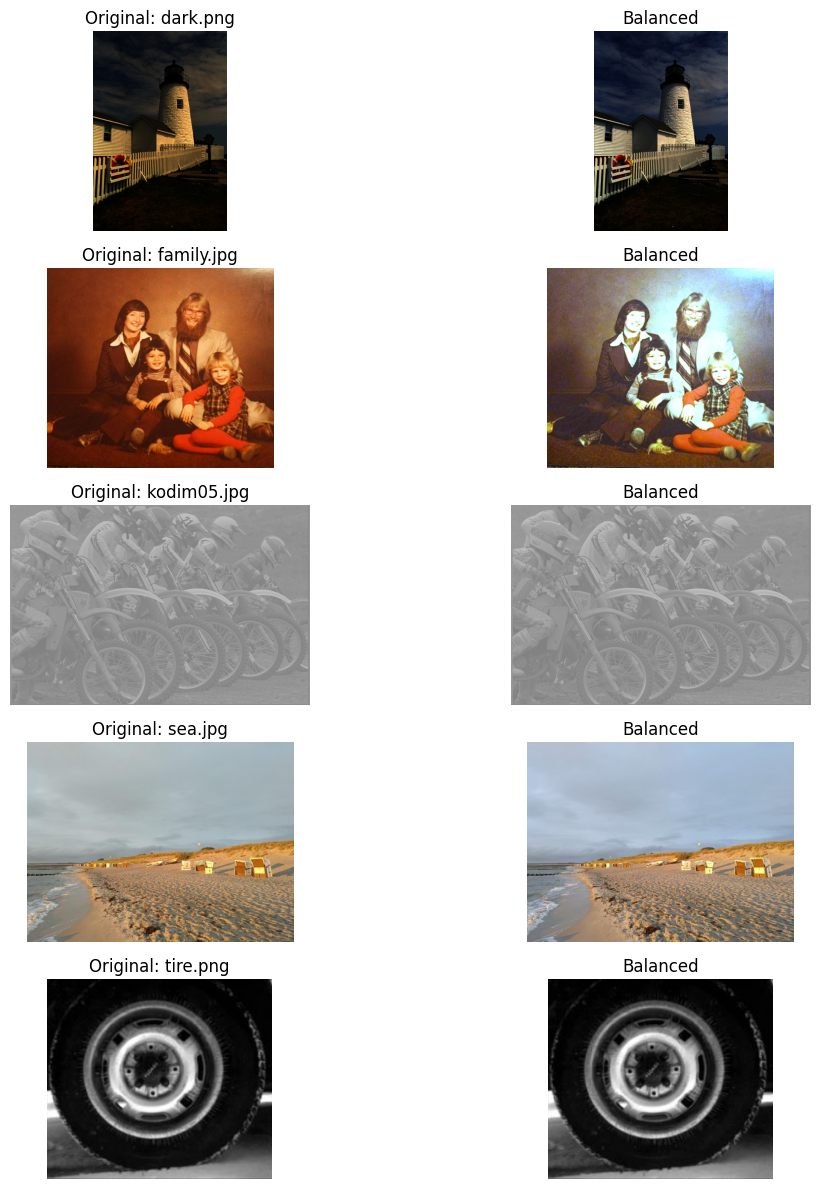

In [ ]:
imgs = ["dark.png", "family.jpg", "kodim05.jpg", "sea.jpg", "tire.png"]

plt.figure(figsize=(12, 12)) 

for i, img_name in enumerate(imgs, 1):
    # Load image
    img = cv2.imread(img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Mean values per channel
    mean_r = np.mean(img[:, :, 0])
    mean_g = np.mean(img[:, :, 1])
    mean_b = np.mean(img[:, :, 2])

    # Scale-to-brightest-channel balancing
    max_mean = max(mean_r, mean_g, mean_b)
    kr = max_mean / mean_r
    kg = max_mean / mean_g
    kb = max_mean / mean_b

    # Apply balancing
    balanced = img.astype(np.float32)
    balanced[:, :, 0] *= kr
    balanced[:, :, 1] *= kg
    balanced[:, :, 2] *= kb
    balanced = np.clip(balanced, 0, 255).astype(np.uint8)

    # Show results
    plt.subplot(len(imgs), 2, 2*i - 1)
    plt.imshow(img)
    plt.title(f"Original: {img_name}")
    plt.axis('off') 

    plt.subplot(len(imgs), 2, 2*i)
    plt.imshow(balanced)
    plt.title("Balanced")
    plt.axis('off')

plt.tight_layout()
plt.show()


### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

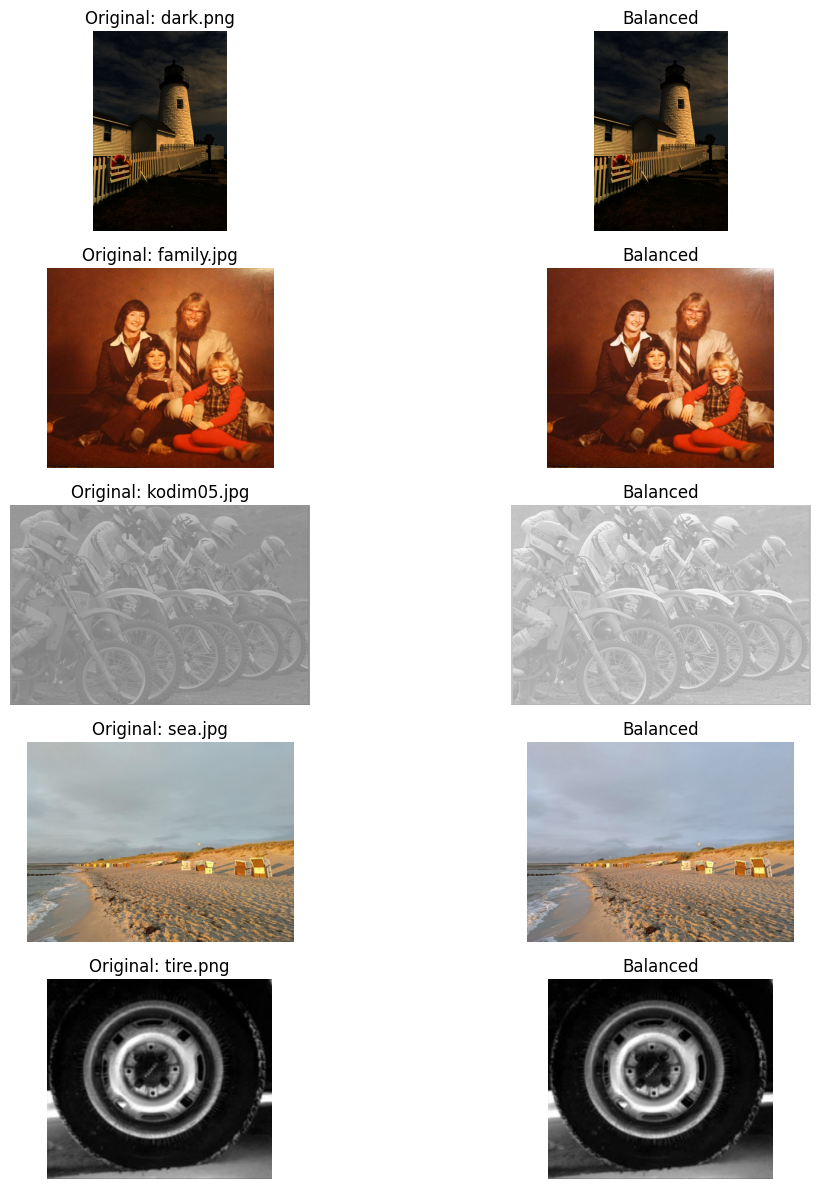

In [49]:
imgs = ["dark.png", "family.jpg", "kodim05.jpg", "sea.jpg", "tire.png"]

plt.figure(figsize=(12, 12)) 

for i, img_name in enumerate(imgs, 1):
    img = cv2.imread(img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Compute the maximum values for all three colour channels (red, green, blue)
    max_r = np.max(img[:, :, 0])
    max_g = np.max(img[:, :, 1])
    max_b = np.max(img[:, :, 2])

    # Apply scale-by-max balancing and generate the balanced image
    balanced = img.astype(np.float32)
    balanced[:, :, 0] = (balanced[:, :, 0] / max_r) * 255
    balanced[:, :, 1] = (balanced[:, :, 1] / max_g) * 255
    balanced[:, :, 2] = (balanced[:, :, 2] / max_b) * 255
    balanced = np.clip(balanced, 0, 255).astype(np.uint8)

    # Show results
    plt.subplot(len(imgs), 2, 2*i - 1)
    plt.imshow(img)
    plt.title(f"Original: {img_name}")
    plt.axis('off') 

    plt.subplot(len(imgs), 2, 2*i)
    plt.imshow(balanced)
    plt.title("Balanced")
    plt.axis('off')

plt.tight_layout()
plt.show()